# Preprocessing

In [3]:
import numpy as np
import pandas as pd
import os
file_path = os.path.abspath('')
print(file_path)
DATA_FOLDER_PATH = os.path.join(file_path, 'data')
PROCESSED_DATA_FOLDER_PATH = os.path.join(file_path, 'processed_data')
if not os.path.exists(PROCESSED_DATA_FOLDER_PATH):
    os.mkdir(PROCESSED_DATA_FOLDER_PATH)

c:\Users\tinus\OneDrive\Dokumenter\01 MIT H23\15.071 The Analytics Edge\The-Analyst-Edge-Project


In [8]:
df = pd.read_csv(os.path.join(DATA_FOLDER_PATH, 'dataset.csv'))
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [18]:
df['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

## Transfer to correct data type

In [17]:
categorical_values = [
    "Marital status",
    "Application mode",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Target"
]
float_values = [
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]
int_values = list(df.columns.drop(categorical_values).drop(float_values))
print(int_values)


['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


In [19]:
print(len(df.columns) == len(categorical_values) + len(float_values) + len(int_values))

True


In [20]:
# Convert columns in categorical_values to 'category' dtype
for col in categorical_values:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert columns in float_values to 'float' dtype
for col in float_values:
    if col in df.columns:
        df[col] = df[col].astype(float)

# Convert columns in int_values to 'int' dtype
for col in int_values:
    if col in df.columns:
        df[col] = df[col].astype(int)


In [23]:
# Filter out rows where 'Target' is 'Enrolled'
df_filtered = df[df['Target'].isin(['Dropout', 'Graduate'])]

df_filtered['Target'] = df_filtered['Target'].cat.remove_unused_categories()
df = df_filtered
print(df['Target'].unique())
print(len(df))

['Dropout', 'Graduate']
Categories (2, object): ['Dropout', 'Graduate']
3630


C:\Users\tinus\AppData\Local\Temp\ipykernel_28176\1398834565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Target'] = df_filtered['Target'].cat.remove_unused_categories()


## Make train and test sets for consistency with correct dayatypes

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% train, 30% test)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Create the folder if it doesn't exist
os.makedirs(PROCESSED_DATA_FOLDER_PATH, exist_ok=True)

# File paths for the CSV files
train_file_path = os.path.join(PROCESSED_DATA_FOLDER_PATH, 'train.csv')
test_file_path = os.path.join(PROCESSED_DATA_FOLDER_PATH, 'test.csv')

# Save the DataFrames as CSV files
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)


## Here, I wanna try to really understand what the deal is with Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) 

In [28]:
curricular_vars_1st_sem = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)"
]
df_cur = df[curricular_vars_1st_sem]

In [29]:
for column in df_cur.columns:
    print(f"Frequency of values in column '{column}':")
    print(df[column].value_counts())
    print("\n")

Frequency of values in column 'Curricular units 1st sem (credited)':
0     3150
2       71
1       67
3       57
6       43
4       43
5       31
7       31
8       27
9       24
11      16
10      14
14      14
13      12
12      11
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64


Frequency of values in column 'Curricular units 1st sem (enrolled)':
6     1594
5      749
7      546
8      264
0      152
12      54
10      43
11      37
9       31
15      24
14      22
4       21
18      19
13      16
17      13
16      12
3        9
2        7
21       6
1        6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64


Frequency of values in column 'Curricular units 1st sem (evaluations)':
8     674
7     621
6     530
0     321
9     296
10    235
5     193
11    162
12    160
13    104
14     77
15     49
16     37
17     29
18     22
19     18
4      18
21     15
22     10


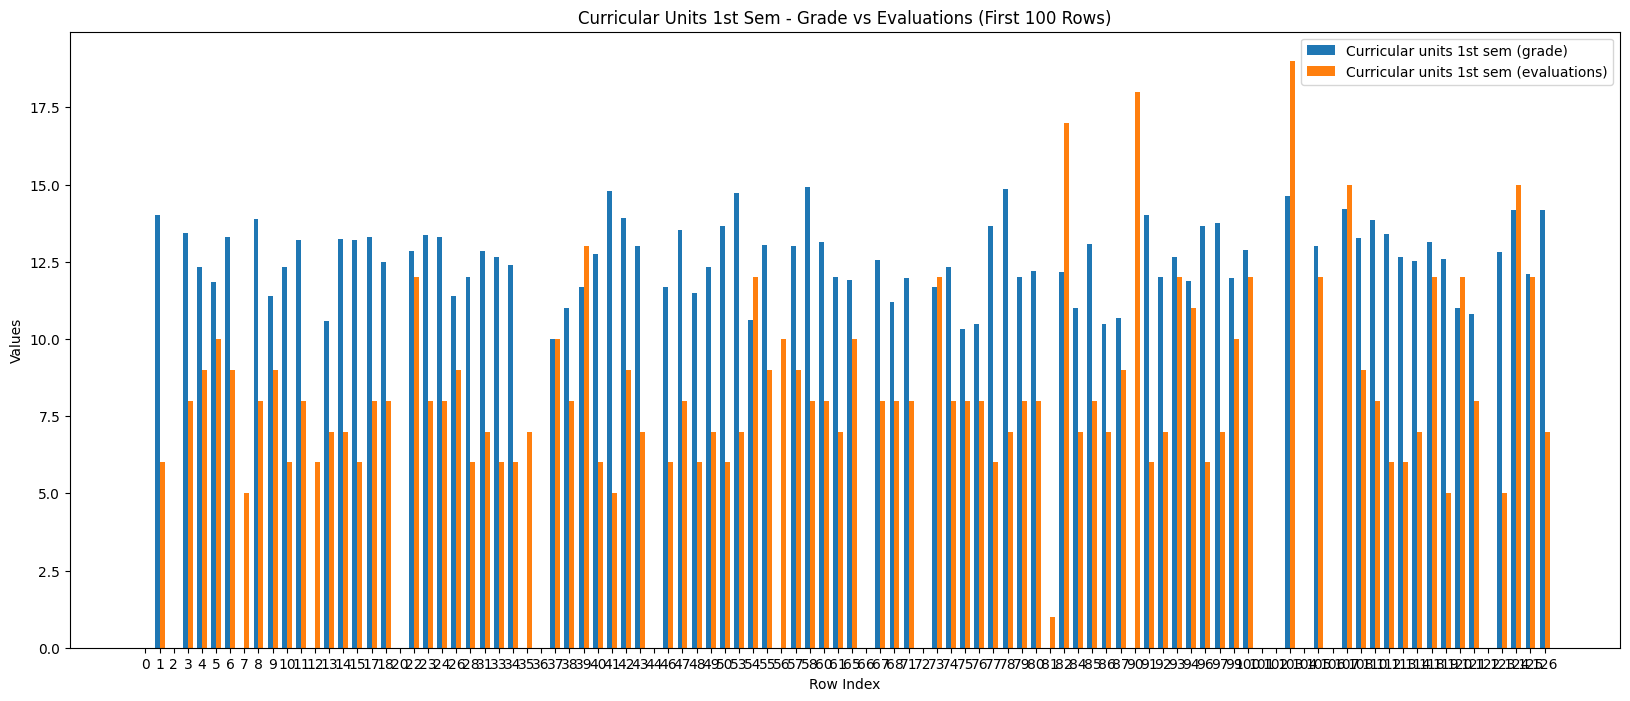

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_cur is your DataFrame and it contains the specified columns
# Selecting the first 100 rows for the plot
df_subset = df_cur.head(100)

# Setting the positions for the bars
bar_width = 0.35
index = np.arange(len(df_subset))

# Plotting
plt.figure(figsize=(20, 8))
plt.bar(index, df_subset['Curricular units 1st sem (grade)'], bar_width, label='Curricular units 1st sem (grade)')
plt.bar(index + bar_width, df_subset['Curricular units 1st sem (evaluations)'], bar_width, label='Curricular units 1st sem (evaluations)')

plt.xlabel('Row Index')
plt.ylabel('Values')
plt.title('Curricular Units 1st Sem - Grade vs Evaluations (First 100 Rows)')
plt.xticks(index + bar_width / 2, df_subset.index)
plt.legend()
plt.show()


## Create different datasets for different usecases

### A: With tuition fees up to date

In [ ]:
## Case 1) With all the columns
df_all = df.copy()
## Case 2a) Without 2nd sem results columns
df_during_2nd_sem = df_all.drop(columns=['Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (evaluations)',
                              'Curricular units 2nd sem (approved)',
                              'Curricular units 2nd sem (grade)',
                              'Curricular units 2nd sem (without evaluations)'])
## Case 2b) Without 2nd semester columns altogether
df_before_2nd_sem = df_during_2nd_sem.drop(columns=['Curricular units 2nd sem (enrolled)'])
## Case 3a) Without 1st semester results columns
df__during_1st_sem = df_before_2nd_sem.drop(columns=['Curricular units 1st sem (credited)',
                              'Curricular units 1st sem (evaluations)',
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)'])
## Case 3a) Without 1st semester columns
df_before_1st_sem = df__during_1st_sem.drop(columns=['Curricular units 1st sem (enrolled)'])


In [ ]:
### B: Without Tuition column
# Case 1: With all columns except "Tuition fees up to date"
df_all_no_tuition = df.drop(columns=['Tuition fees up to date'])

# Case 2a: Without 2nd sem results columns and "Tuition fees up to date"
df_during_2nd_sem_no_tuition = df_all_no_tuition.drop(columns=[
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
])

# Case 2b: Without 2nd semester columns altogether and "Tuition fees up to date"
df_before_2nd_sem_no_tuition = df_during_2nd_sem_no_tuition.drop(columns=['Curricular units 2nd sem (enrolled)'])

# Case 3a: Without 1st semester results columns and "Tuition fees up to date"
df_during_1st_sem_no_tuition = df_before_2nd_sem_no_tuition.drop(columns=[
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)'
])

# Case 3b: Without 1st semester columns and "Tuition fees up to date"
df_before_1st_sem_no_tuition = df_during_1st_sem_no_tuition.drop(columns=['Curricular units 1st sem (enrolled)'])
